# Prosper Loan Data

Prosper is a peer-to-peer lending platform. Borrowers can find competitive rates for personal loans with one, three or five-year terms. Behind the scenes, loans are funded by investors, not Prosper itself. Prosper offers loan rates instantly without affecting your credit score.
This dataset is a financial dataset of the loans, borrowers, lenders, interest rates  of Prosper or Prosper Marketplace Inc. which is  a San Francisco, California based .
So in this company you are rthier a borrower or an investor 
- In this dataset, we are using the data from the Posper to analyse it and trying to find  pattern and generate valuable insights and obseravation.



## Preliminary Wrangling


In [46]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [47]:
#setting workoing dircitory

%cd "C:\Users\user\.jupyter"

C:\Users\user\.jupyter


In [665]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [49]:
#exploring some statistic and info 
loan_data.shape

(113937, 81)

In [660]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           62605 non-null   category
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113937 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

# The main feature of the analysis

In this analysis we will try to answer questions that we think it might be benficail to the 
an investor wants to invest his money,we will try to ansewr some question ralted to the factors affect yeild anad estemate yeild rate 
and factors affect  Borrower's Annual Percentage Rate (APR) for the loan / BorrowerRate.

## The structure of our dataset?


- The dataset is comprised of 81 variables and contains 113937 observations. The variables are explored in the dataset are the following :

EstimatedEffectiveYield : Yield of lenders from borrowers minus the processing fee and late fines

LenderYield	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

BorrowerAPR : The Borrower’s Annual Percentage Rate (APR) for the loan.

BorrowerRate : The Borrower’s interest rate for this loan.

BankcardUtilization	The percentage of available revolving credit that is utilized at the time the credit profile was pulled. 

DebtToIncomeRatio : The debt to income ratio of the borrower at the time the credit profile was pulled.

StatedMonthlyIncome : Monthly income of the borrower

AmountDelinquent	Dollars delinquent at the time the credit profile was pulled.

AvailableBankcardCredit	The total available credit via bank card at the time the credit profile was pulled.
MonthlyLoanPayment : Monthly loan payment amount
LoanOriginalAmount : Original amount of the loan


Term : Amount of month customers opted for loan

ProsperScore : Risk Factor score from 1 to 10. 10 being least risky

LoanStatus : Current status of the loan like chargedoff, completed, defauted etc…
ListingCategory..numeric. : Prosper rating for borrowers in numbers 

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

EmploymentStatus : Current type of employment

EmploymentStatusDuration : How long the employee has been employed

IncomeVerifiable : If the income of the borrower is verifiable at the time of listing (True & False)


IsBorrowerHomeowner : Does the borrower owns house at the time of listing (True & False)

ProsperScore	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

ProsperRating..Alpha. : Prosper rating for borrowers in alphabets

Recommendations : Recommendations the borrowers has at the time of listing 




TotalProsperLoans	Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.  



# Univariate Exploration¶


In [277]:
#lets look at the sataistics of our main variables of interset 
loan_data[['LenderYield','EstimatedEffectiveYield' ,'BorrowerAPR','BorrowerRate']].describe()

,LenderYield,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate
count,113937.000000,84853.000000,113937.000000,113937.000000
mean,0.182701,0.168661,0.218780,0.192764
std,0.074516,0.068467,0.080421,0.074818
min,-0.010000,-0.182700,0.000000,0.000000
25%,0.124200,0.115670,0.156290,0.134000
50%,0.173000,0.161500,0.209710,0.184000
75%,0.240000,0.224300,0.283700,0.250000
max,0.492500,0.319900,0.512290,0.497500


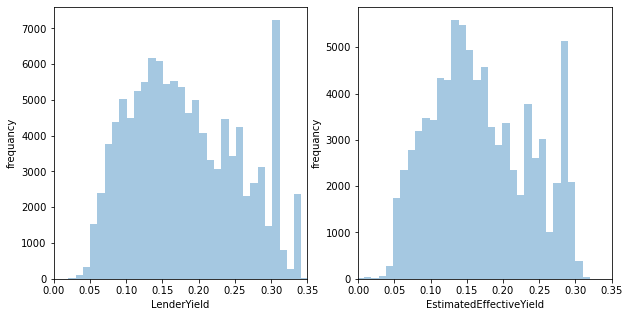

In [278]:
#let's look on distribution of the variable of interest: lender yield & EstimatedEffectiveYield
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.ylabel('frequancy')
sb.distplot(loan_data['LenderYield'] , kde=False);
plt.xlim(0 ,.35)
plt.subplot(1,2,2)
plt.ylabel('frequancy')
sb.distplot(loan_data['EstimatedEffectiveYield'] , kde=False);
plt.xlim(0 ,.35);


- PLot tends to be Truncated or Heart-Cut Distribution , the interst rate on the loan like a normal distribution with the tails cut off and one out lier near  rate = to 30% .


In [262]:
loan_data['BorrowerAPR'].isna().sum()
loan_data['BorrowerAPR']= loan_data['BorrowerAPR'].fillna(0)

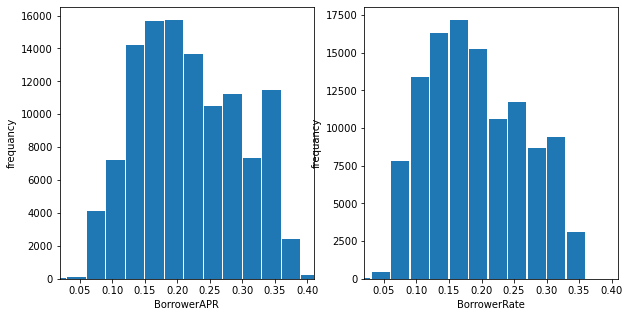

In [263]:
#lets look on distribution of borrowere interst rate & BorrowerAPR
plt.figure(figsize=(10,5))
bins = np.arange(loan_data['BorrowerAPR'].min() ,loan_data['BorrowerAPR'].max()+.03 ,.03  )
plt.subplot(1,2,1)
plt.ylabel('frequancy')
plt.xlabel('BorrowerAPR')
plt.hist(data =loan_data , x='BorrowerAPR',bins=bins ,rwidth=.95);
plt.xticks(np.arange(.05,.4+.05,.05))
plt.xlim(.02 ,.41)
plt.subplot(1,2,2)
bins = np.arange(loan_data['BorrowerRate'].min() ,loan_data['BorrowerRate'].max()+.03 ,.03  )
plt.ylabel('frequancy')
plt.xlabel('BorrowerRate')
plt.hist(data =loan_data , x='BorrowerRate',bins=bins ,rwidth=.93);
plt.xticks(np.arange(.05,.4+.05,.05))
plt.xlim(.02 ,.41);

In Both plots The distibution tends to be normal

## After looking into our variables of interst we will  invistgate 
## Factors that affect lender/inverstor dicision and Estamaited Yeild rate

First factor we might exlore  the term "delinquent
In the personal finance field, commonly refers to a situation where a borrower is late or overdue on a payment, such as income taxes, a mortgage, an automobile loan, or a credit card account. 
CurrentDelinquencie : Number of accounts delinquent at the time the credit profile was pulled.
AmountDelinquent : 	Dollars delinquent at the time the credit profile was pulled.

In [435]:
#first we have alook on the satatiscics
loan_data[['CurrentDelinquencies' , 'AmountDelinquent']].describe()

,CurrentDelinquencies,AmountDelinquent
count,113240.000000,106315.000000
mean,0.592052,984.507059
std,1.978707,7158.270157
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,83.000000,463881.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


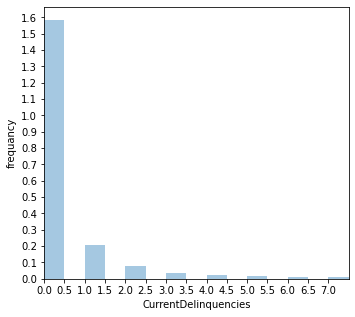

In [785]:
plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
bins= np.arange(0 ,loan_data['CurrentDelinquencies'].max()+.5 , .5 )
sb.distplot(loan_data['CurrentDelinquencies'],bins=bins)
plt.xlim((0,7.5));
plt.xticks(np.arange(0,7.5,.5));
plt.yticks(np.arange(0,1.7,.1))
plt.ylabel('frequancy');

- statiscs showes more than 75% equals to 0 
- Plot also  shows most of the data around 0  means that low level of Delinquencies gives a good sign for an investor bit we might look closer in biviarate analysis since The delinquency rate is commonly used by analysts to determine the quality of the loan

Understanding the Delinquency Rate
The delinquency rate is commonly used by analysts to determine the quality of the loan portfolio of lending companies or banks. It compares the percentage of loans that are overdue to the total number of loans. A lower rate is always desirable, as it indicates that there are fewer loans in the lender’s loan portfolio that are paying outstanding debt late.

One of the important factors to the investor/lender  is the AvailableBankcardCredite which isThe total available credit via bank card at the time the credit profile was pulled.

In [376]:
loan_data['AvailableBankcardCredit'].describe()

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

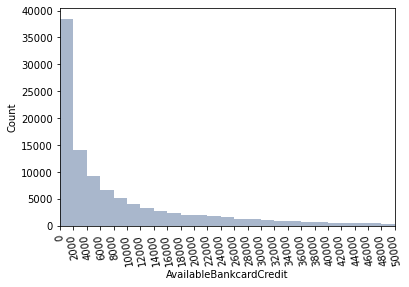

In [452]:
#BankcardUtilization	The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
bins = (np.arange(0,55000,2000))
sb.distplot(loan_data['AvailableBankcardCredit'] , kde=False , bins=bins ,color = '#294b80')
plt.xlim((0,50000))
plt.xticks(np.arange(0,51000 , 2000) , rotation = 100);
plt.ylabel('Count');

 Plot is Right skwed with one peak around 2000 which gives neagtive sign so far  for an investor since most creditworthy   applicants with stable incomes can expect credit card credit limits between 3500 and 7500 Dollars. High-income applicants  with excellent credit might expect a credit limit of up to or more than 10000.
 - we might look it closely in Bivirate analysis when we plot AvailableBankcardCredit against Income Range

We will continue to invistgate credit satatues of the dataset since it is importnat foactor for  an investor to take decide to invest and also iportant calcluting estimited yeld rate  
  - Now will we look into BankcardUtilization	which is The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
 - it's how much borrower currently owe divided by your credit limit. It is generally expressed as a percent.


In [453]:
#let's display statiscs first 
loan_data['BankcardUtilization'].describe()

count    106333.000000
mean          0.561309
std           0.317918
min           0.000000
25%           0.310000
50%           0.600000
75%           0.840000
max           5.950000
Name: BankcardUtilization, dtype: float64

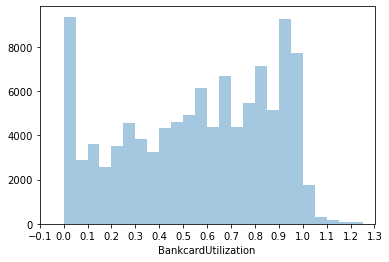

In [458]:
# lets plot bank card utilization ratios on histogram 
bins = np.arange(0 ,1.3,.05)
sb.distplot(loan_data['BankcardUtilization'] , kde=False, bins=bins)
plt.xlim((0,1.25))
plt.xticks(np.arange(-0.1,1.35,.1));

 - Plot is unimodel with 2 clear peaks and tends to be left skewd with peak between 0 and 10% 
   and peak around 90% 
 - The general rule of thumb has been that  CUR must not exceed 30%, but increasingly financial experts are recommending    that  don't  go above 10% if borrower really want an excellent credit score.
 - statiscs shows that only 25%v from the data are below 30% which is considers negative for certain borrower credit score
 - High utilization could lead to a higher debt-to-income ratio which is not good sign for lender/investor, we will look to
   DebtToIncomeRatio in the next graph.

- Dept to inconme ratio is a way lenders measure borrowers ability to manage the monthly payments to repay the money you plan to borrow.
- debt-to-income ratio is all  monthly debt payments divided by  gross monthly income.

In [459]:
#dipaly statiscs first
loan_data['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

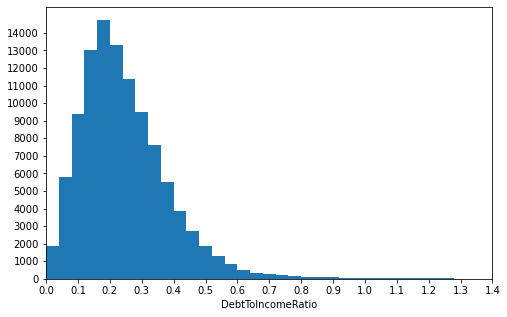

In [358]:
#Now let's plot it 
plt.figure(figsize=[8, 5])
bins= np.arange(0 ,loan_data['DebtToIncomeRatio'].max()+.04 , .04 )
plt.hist(data = loan_data, x = 'DebtToIncomeRatio' ,bins=bins)
plt.xlim((0,1.25))
plt.xticks(np.arange(0,1.5,.1));
plt.yticks(np.arange(0 ,15000 , 1000)
plt.xlabel('DebtToIncomeRatio')
plt.show()

- PLot tends to be right skewed with peak around 20% 
- A debt-to-income ratio of 20% or less is considered low. The Federal Reserve considers a DTI of 40% or more a sign of financial stress.
- since most of out borrowers lies between 0 and 50 % ,here anthor good sign for an investor

## After finishing some numerical features of the dataset let's head towrd catgorical variables that might affect our varible of interest

The Prosper Rating is proprietary system that allows Prosper to maintain consistency when evaluating each loan application. Prosper Ratings allow investors to consider a loan's level of risk because the rating represents an estimated average annualized loss rate range. ..

In [473]:
loan_data['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

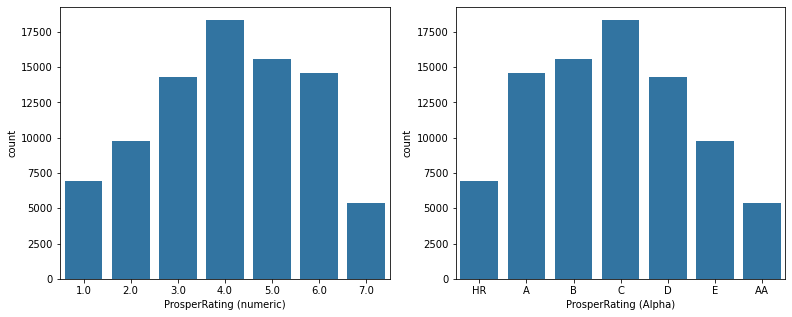

In [789]:
#we will look to the rating of prosper which is the The  Prosper Rating assigned at the time the listing was created:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
default_color = sb.color_palette()[0]

sb.countplot(data=loan_data , x='ProsperRating (numeric)' , color=default_color );
plt.subplot(1,2,2)
sb.countplot(data=loan_data , x='ProsperRating (Alpha)' , color=default_color );

Seems most of the loans have ranking c,b,a and d which considerd quite good for an investor

- Next feature is the Prosper Score which is th custom risk score was built using historical Prosper data to assess the risk of Prosper borrower listings.
Prosper Scoreestimates the probability of a loan going “bad,” where “bad” is the probability of going 60+ days past due
- within the first twelve months from the date of loan origination.The score ranges from 1-10, with 10 being the best, or lowest risk score.

In [359]:
#Now  we will look into feature of the data    
loan_data['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

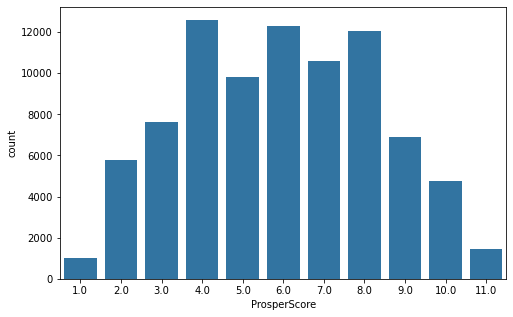

In [790]:
#let's use bar chart here since score considers catgorigacl variabel 
plt.figure(figsize=(8,5))
default_color = sb.color_palette()[0]
sb.countplot(data=loan_data , x='ProsperScore' , color=default_color);


- The Prosper scores are  normaly distributed between scores where most of the data between 4&8 scores which quite modreate 


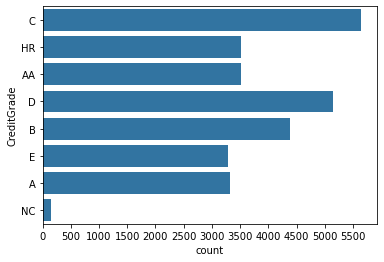

In [792]:
#continue ploting catogrical features affecting  lets plot credit grades b
default_color = sb.color_palette()[0]
plt.xticks(np.arange(0,7000,500))
sb.countplot(data=loan_data , y='CreditGrade' , color=default_color );

The Credit rating that was assigned at the time the listing went live. If we observe the count for each CreditGrade, we notcie that count of NC (no credit) borrowers are quite few. 

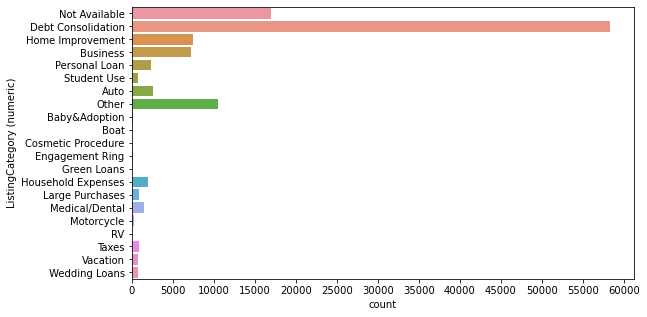

In [496]:
#lets PLOT various types of loans that borower might acquir
fig, ax = plt.subplots(figsize = [9,5])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = 'Not Available',"Debt Consolidation",'Home Improvement','Business',"Personal Loan",'Student Use','Auto','Other','Baby&Adoption',"Boat", 'Cosmetic Procedure',"Engagement Ring",'Green Loans', 'Household Expenses','Large Purchases','Medical/Dental', "Motorcycle", "RV", 'Taxes', 'Vacation', ' Wedding Loans'
default_color  =sb.color_palette()[0]
sb.countplot(data=loan_data,y= 'ListingCategory (numeric)')
ax.set_yticklabels(labels);
plt.xticks(np.arange(0,65000, 5000));

It is obvious that most of the most common loan among borrowers is the debit conslidation loan , we will look closer to this types of loans in further analysis

before we look into loan status ,let's define some terms 
The term "charge off" means that the original creditor has given up on being repaid according to the original terms of the loan. It considers the remaining balance to be bad debt, but that doesn't mean you no longer owe the amount that has not been repaid.
Loan default occurs when a borrower fails to pay back a debt according to the initial arrangement.

In [295]:
# Now let's see the currnt satues for loans
loan_data['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

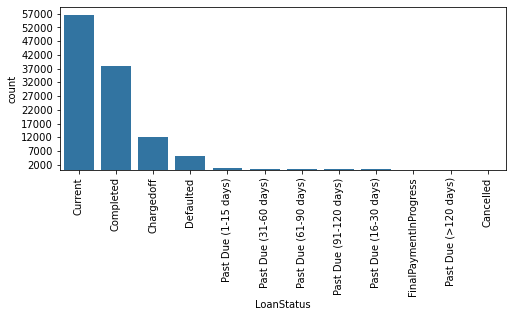

In [307]:
plt.figure(figsize=(8,3))
default_color = sb.color_palette()[0]
type_order = loan_data['LoanStatus'].value_counts().index
sb.countplot(data=loan_data , x='LoanStatus' ,color=default_color , order=type_order);
plt.xticks(rotation = 90);
plt.yticks(np.arange(2000 , 60000 ,5000));

The bar cahrt shows that cahrged off and defaulted loans are less comparing completed and current 

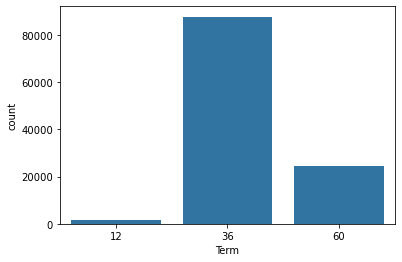

In [127]:
#lets look leghnth of the loan plan in months by ploting term feature
color = sb.color_palette()[0]
sb.countplot(data=loan_data , x='Term' , color=color);


It is obvious that 3 year loan is the most commen plan obtaind by borrowers

Now we will explore more features realted the borrowers beahviour and affecting investor/lener 


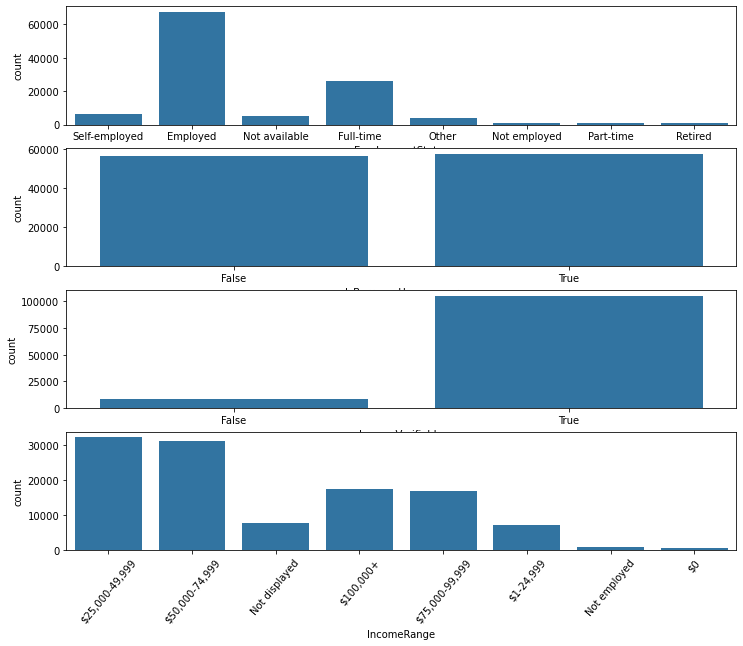

In [265]:
fig, ax = plt.subplots(nrows=4, figsize = [12,10])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = loan_data, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[1])
sb.countplot(data = loan_data, x = 'IncomeVerifiable', color = default_color, ax = ax[2])
sb.countplot(data = loan_data, x = 'IncomeRange', color = default_color, ax = ax[3])
plt.xticks(rotation = 50)
plt.show()

- It seems that employment_satus feature is afcting as employed borrowers are the hieghst to recive loans while retired , not emplyed and part time employed borrowers are the lowset among borrowers 
- Also invome varfied borrowers are more likely to recive loans than those who does not varfiy thier income
- Borrowers homeowener seems dose not have signifacnt effect 
- pepole with income from 50000- 75000 tends to borrow more than 75000-10000+

 # Bivariate Exploration¶


let's start by defining numerical and qualitive fatures of interst 



In [ ]:
categoric_vars = ['ProsperRating (Alpha)','LoanStatus', 'Term', 'ProsperScore', 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable','IncomeRange']
numric_vars = ['BorrowerAPR', 'LenderYield', 'EstimatedEffectiveYield', 'CurrentDelinquencies','AvailableBankcardCredit' , 'MonthlyLoanPayment' ,
               'TotalTrades' ,'LP_InterestandFees','LP_ServiceFees' ,'LP_CollectionFees', 'LP_NetPrincipalLoss'
              'LP_NonPrincipalRecoverypayments']


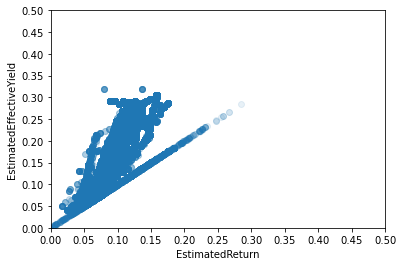

In [761]:
#first we will try to find the realtion between numarical varaibles 
#we will start by EstimatedEffectiveYield &EstimatedReturn
sb.regplot(data= loan_data ,x='EstimatedReturn' ,y='EstimatedEffectiveYield' ,
          scatter_kws={'alpha':.1} ,fit_reg=False);
plt.xlim(0,.5)
plt.xticks(np.arange(0,.55 , .05));
plt.ylim(0,.5)
plt.yticks(np.arange(0,.55 , .05));

We can observe clear postive realtion between EstimatedReturn&EstimatedEffectiveYield

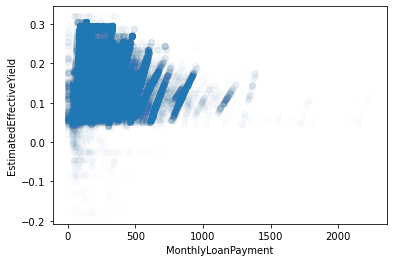

In [699]:
#contonuie with numiracl varilabels 
sb.regplot(data= loan_data ,y='EstimatedEffectiveYield' ,x='MonthlyLoanPayment' ,x_jitter=1/2 ,
           scatter_kws={'alpha':.01} ,fit_reg=False);

The scatter plot was not readable,hence we added jitter and alpha .Plot tends to give negative between the variables relatoin specialy data point byond monthly payment = 500   as monthly payment increases , EstimatedEffectiveYield 

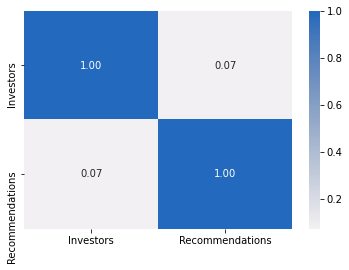

In [762]:
#in this plot we tried to defin if there is any realtion between number of recommndation borrower have 
# and the tendancy of the investors to invest by looking into number of investore   
sb.heatmap(loan_data[['Investors','Recommendations']].corr() , annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);


- it seems taht there is no realtion between the number of Recommendations and the Investors numbers.
- I might happend because there were no much recomandations in the data  

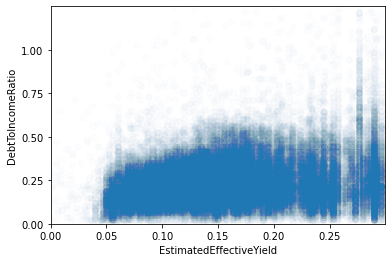

In [774]:
sb.regplot(loan_data['EstimatedEffectiveYield'] , loan_data['DebtToIncomeRatio'] ,fit_reg=False , 
           scatter_kws={'alpha':.01})
plt.ylim(0,1.25)
plt.yticks(np.arange(0,1.25,.25))
plt.xlim(0,.3)
plt.xticks(np.arange(0,.3,.05));


- There is no realtion between EstimatedEffectiveYield & DebtToIncomeRatio
- Depttoincomeratob data are bettween 0 & 50% rate which is quite good


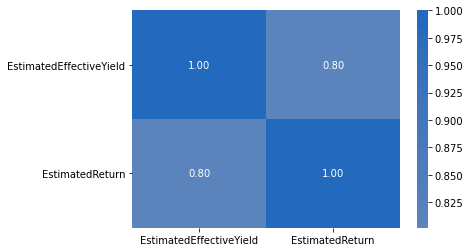

In [706]:
sb.heatmap(loan_data[['EstimatedEffectiveYield','EstimatedReturn']].corr() , annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

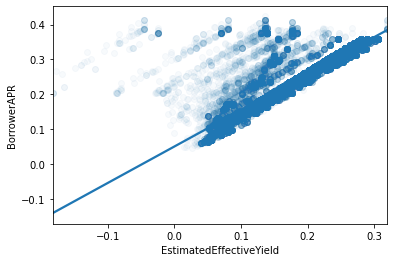

In [764]:
sb.regplot(data= loan_data ,x='EstimatedEffectiveYield' ,y='BorrowerAPR' , scatter_kws={'alpha':.03});

plt.show()

- plot shows clear postive realtion bewteen estmited effective yield and boorower annul rate
- As borrower apr rate increase the estimated effective yield will incarease

## let's plot numrical with catgorical varibales

IN this plot lets plot loan listing catgory with our variable of interset EstimatedEffectiveYield to observe patterns in the loans catgories

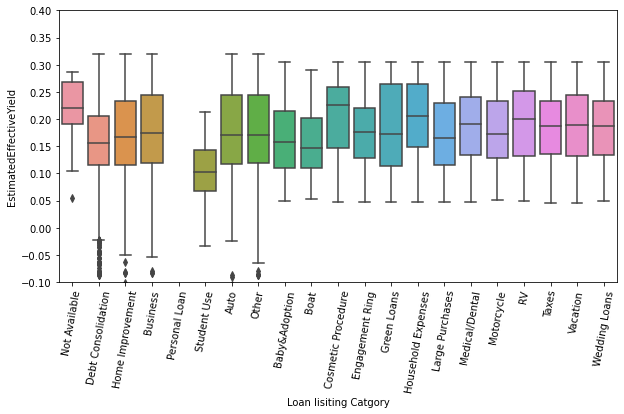

In [542]:
fig, ax = plt.subplots(figsize = [10,5])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = 'Not Available',"Debt Consolidation",'Home Improvement','Business',"Personal Loan",'Student Use','Auto','Other','Baby&Adoption',"Boat", 'Cosmetic Procedure',"Engagement Ring",'Green Loans', 'Household Expenses','Large Purchases','Medical/Dental', "Motorcycle", "RV", 'Taxes', 'Vacation', ' Wedding Loans'
sb.boxplot(data=loan_data, x='ListingCategory (numeric)', y='EstimatedEffectiveYield')
ax.set_xticklabels(labels);
plt.xticks(rotation= 80);
plt.xlabel('Loan lisiting Catgory')
plt.yticks(np.arange(-.1,1,.05))
plt.ylim(-.1,.4)
plt.show()


- In this graph we can notice the avrage for the various types of loans is almost around 15-20% estmited effective yeild rate expect for some types 
- Dept conslidation type have alot of the ouliers (data more than 1.5 from the avrage) which is below 0% effictive yeild 
   meaaning estmiated losses ,this type of loan aborrower  obtains a new loans to pay out a number of smaller loans, debts, or bills that they are currently making payments on . 

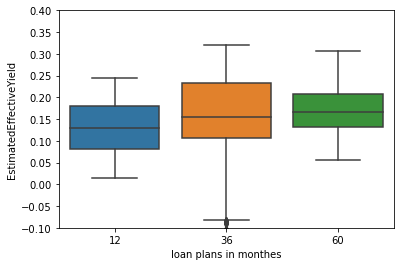

In [550]:
#Now lets check loan plans in 

sb.boxplot(data=loan_data, x='Term', y='EstimatedEffectiveYield');
plt.yticks(np.arange(-.1,1,.05))
plt.ylim(-.1,.4)
plt.xlabel('loan plans in monthes')
plt.show()

- in 36 months loan paln plot showes outliers  with avrage estmaited yeild rate around 15% and the lower whisker between -.05 % & -.10 % which is estmieted losses 
- plot showes normal ditription  in 60 months loan paln with avrage estmaited yeild rate around 16% 


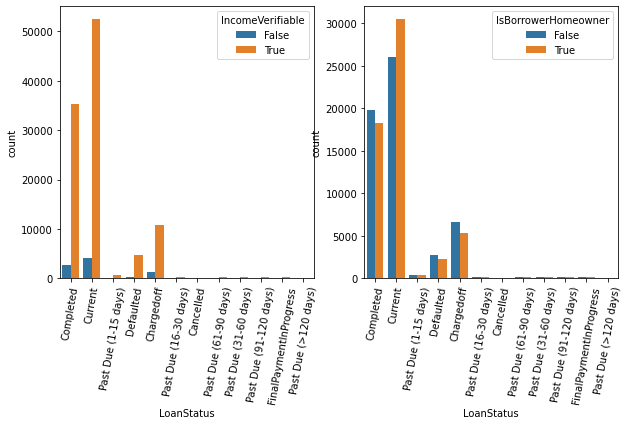

In [613]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sb.countplot(data=loan_data, hue='IncomeVerifiable', x='LoanStatus');
plt.xticks(rotation= 80)

plt.subplot(1,2,2)
sb.countplot(data=loan_data, hue='IsBorrowerHomeowner', x='LoanStatus');
#plt.yticks(np.arange(0,50000,3000))
#plt.ylim(0,35000)
#plt.xlabel('loan plans in monthes')
plt.xticks(rotation= 80)
plt.show()

After invistatgting this varibales again in the Bivariate analysis we assure that IncomeVerification and home ownership are not affecting borrower ability to settle his dept (loan Status) as we can see 


In [777]:
## Let's check EstimatedEffectiveYield with every  ProsperRating 
loan_data['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

<Figure size 576x360 with 0 Axes>

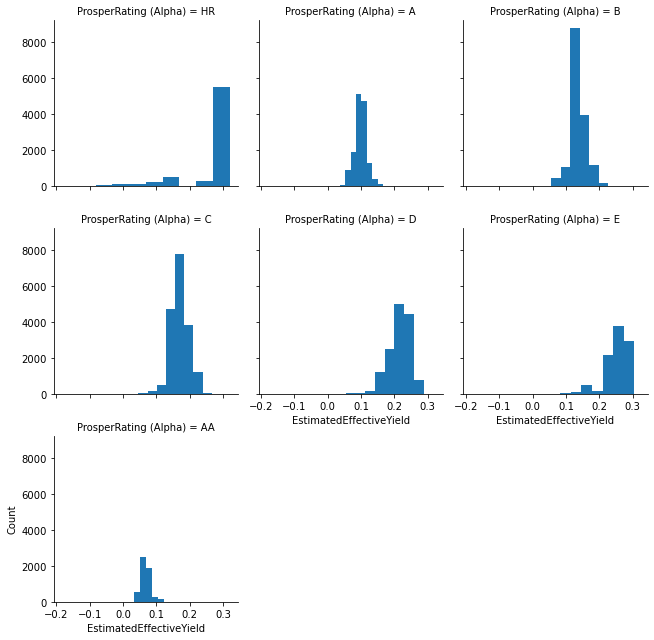

In [787]:
plt.figure(figsize=(8,5))
# Convert the "loan status " column from a plain object type into an ordered categorical type
Rating_classes = ['HR','A', 'B', 'C', 'D', 'E', 'AA']
Lclasses = pd.api.types.CategoricalDtype(ordered=True, categories=Rating_classes)
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].astype(Lclasses);
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loan_data, col = 'ProsperRating (Alpha)',col_wrap=3)
g.map(plt.hist, "EstimatedEffectiveYield")
plt.ylabel('Count')
plt.show()

- Data with Rating HR(highest ranknig) most of its data lies between 20 & 30 % with peak on 30% of EstimatedEffectiveYield.
- Date with Rating AA(lowest ranknig) most of its data lies between 0 & 10 % with peak around 5% of EstimatedEffectiveYield 
- Date with other rating from (B-E) most of its data lies betwwen 10&20% exept for ratinf E which reqirs more invistagtion is it co-incidnce or errors in the data .
- In General Higher rating led to higher Estamited effective Yeild on loans .


## Multivariate Exploration

> Lets plot oy variable of intterset againts the tow variable we think they have realtion with  to investigate our data even


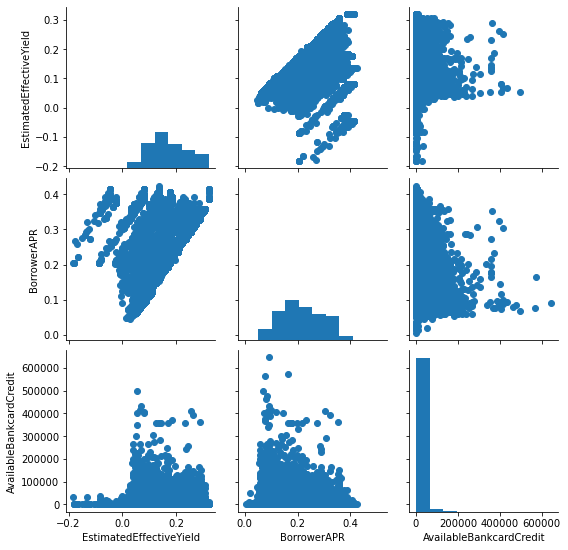

In [651]:
g = sb.PairGrid(data = loan_data, vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'AvailableBankcardCredit'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

- we can see here a psotive realtion betwwen the effective yeild estamited & the borrower APR
- Also no clear realtion between effective yeild estamited & the borrower APR with AvailableBankcardCredit
- EstimatedEffectiveYield & the borrower APR are normally distrupited while AvailableBankcardCredit is left skewd 

In [667]:
#
loan_data['ListingCreationDate']=pd.to_datetime(loan_data['ListingCreationDate'])
loan_data['ListingCreationYear'] = pd.DatetimeIndex(loan_data['ListingCreationDate']).year
loan_data_09 =loan_data[loan_data['ListingCreationYear'] >='2009']
loan_data['ListingCreationYear'].value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationYear, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


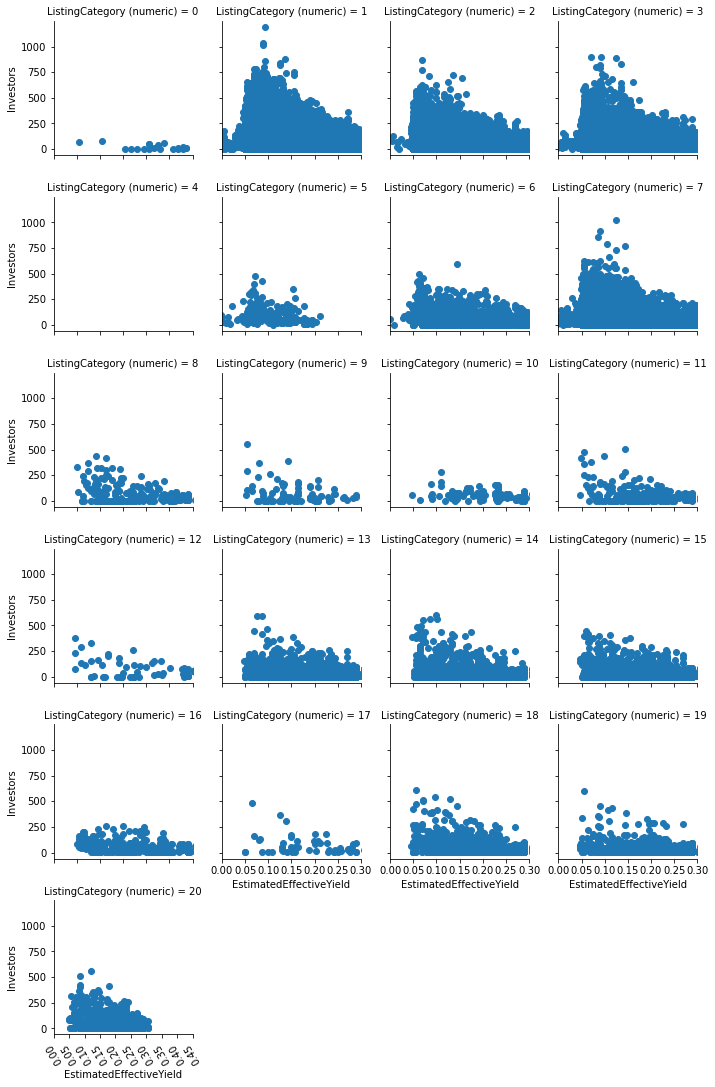

In [729]:
g = sb.FacetGrid(data = loan_data, col = 'ListingCategory (numeric)', size = 2.5,
                margin_titles = True ,col_wrap=4)
g.map(plt.scatter, 'EstimatedEffectiveYield', 'Investors')
plt.xlim(0,.3)
plt.xticks(np.arange(0,.5,.05) ,rotation = 120)
plt.show()

 In this plot we want to look deeply on our investors prefernces and behaviour  interms of loan catgoriesand loan time plan they choseing

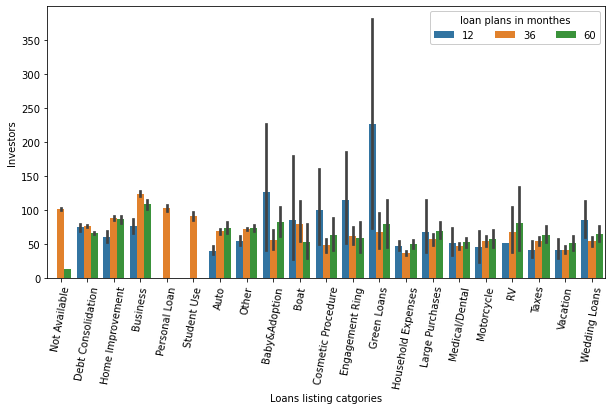

In [748]:
fig, ax = plt.subplots(figsize = [10,5])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = 'Not Available',"Debt Consolidation",'Home Improvement','Business',"Personal Loan",'Student Use','Auto','Other','Baby&Adoption',"Boat", 'Cosmetic Procedure',"Engagement Ring",'Green Loans', 'Household Expenses','Large Purchases','Medical/Dental', "Motorcycle", "RV", 'Taxes', 'Vacation', ' Wedding Loans'
ax = sb.barplot(data = loan_data, x = 'ListingCategory (numeric)', y = 'Investors', hue = 'Term')
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'loan plans in monthes')
#sb.boxplot(data=loan_data, x='ListingCategory (numeric)', y='EstimatedEffectiveYield')
ax.set_xticklabels(labels);
plt.xticks(rotation=80)
plt.xlabel('Loans listing catgories')
plt.show()

- first thing i notice here that investors tends to invest in short term plan (12 months) except for tow typs of loans (personal use & student use they invest in 36 months plan only )
- Investors prfences top 3 were Green loans ,engamment Ring and baby adoptation
- Despite most borrowers choseing 36 months plan ,Investors were likely in 12 months plan which is normal as invstor wants his orignal invsting amount in shorter period time unlike borrower